## Data Exploration

Let's load some data.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_jit = pd.read_parquet("/Users/josht/Documents/GitHub/erdos_twitter_project/Data_Preprocessed/df_user_based_tweets2_features_added.parquet")

In [3]:
df_sh1 = pd.read_parquet("/Users/josht/Documents/GitHub/erdos_twitter_project/Data_Preprocessed/df_tweets_Shashank_features_added_part1.parquet")
df_sh2 = pd.read_parquet("/Users/josht/Documents/GitHub/erdos_twitter_project/Data_Preprocessed/df_tweets_Shashank_features_added_part2.parquet")


In [6]:
df_jit.created_at

0         2021-08-12 14:11:05
1         2021-08-04 23:48:18
2         2021-06-15 00:45:05
3         2021-05-08 16:55:27
4         2021-05-07 08:29:21
                 ...         
277648    2020-04-09 09:21:23
277649    2020-03-09 14:46:21
277650    2020-01-30 13:58:09
277651    2019-11-26 12:30:58
277652    2019-10-24 15:26:33
Name: created_at, Length: 277653, dtype: object

In [7]:
df_sh1.created_at

0         2021-08-12 14:11:05
1         2021-08-04 23:48:18
2         2021-06-15 00:45:05
3         2021-05-08 16:55:27
4         2021-05-07 08:29:21
                 ...         
499995    2020-10-23 09:26:30
499996    2020-10-23 09:13:07
499997    2020-10-23 09:08:46
499998    2020-10-23 09:04:43
499999    2020-10-23 09:00:38
Name: created_at, Length: 500000, dtype: object

In [8]:
df_sh2.created_at

500000    2020-10-23 09:00:16
500001    2020-10-23 08:51:37
500002    2020-10-23 08:24:05
500003    2020-10-23 08:20:00
500004    2020-10-23 08:16:07
                 ...         
914518    2020-03-28 10:04:21
914519    2020-03-09 14:46:21
914520    2020-01-30 13:58:09
914521    2019-11-26 12:30:58
914522    2019-10-24 15:26:33
Name: created_at, Length: 414523, dtype: object

In [10]:
df_jit.text

0         $CDAY - Ceridian: Beat And Raise Still Doesn't...
1         $CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...
2         Designing a digital-first workplace means putt...
3         $CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...
4         $CDAY - Ceridian: Low Quality At A High Price....
                                ...                        
277648    $PKG - Packaging Corporation Of America Will W...
277649    $PKG - Packaging Corporation Of America's Valu...
277650    $PKG - Packaging Corporation of America (PKG) ...
277651    $PKG - Packaging Corporation Of America - The ...
277652    $PKG - Packaging Corporation of America (PKG) ...
Name: text, Length: 277653, dtype: object

In [11]:
df_sh1.text

0         $CDAY - Ceridian: Beat And Raise Still Doesn't...
1         $CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...
2         Designing a digital-first workplace means putt...
3         $CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...
4         $CDAY - Ceridian: Low Quality At A High Price....
                                ...                        
499995    Who’s fault is it that the stimulus bill has n...
499996    From @Breakingviews: Jes Staley’s decision to ...
499997    OPINION: Trump has corrupted our economy with ...
499998    "If you want success, figure out the price, th...
499999    Today is our 10th annual celebration of Servic...
Name: text, Length: 500000, dtype: object

In [12]:
df_sh2.text

500000    Outgoing Guardian Life Insurance CEO Deanna Mu...
500001    COVID has strengthened the US dollar's role in...
500002    Gina Cimarosti would normally be hosting swarm...
500003    This Pakistani man who was born without arms h...
500004    Muhammad Ikram takes aim, flexes his neck and ...
                                ...                        
914518    In the #US, 37 mil jobs are vulnerable to layo...
914519    $PKG - Packaging Corporation Of America's Valu...
914520    $PKG - Packaging Corporation of America (PKG) ...
914521    $PKG - Packaging Corporation Of America - The ...
914522    $PKG - Packaging Corporation of America (PKG) ...
Name: text, Length: 414523, dtype: object

Looks like Jithin's data are basically subset of Shashank's data. Let's use the latter.

In [15]:
df = pd.concat([df_sh1, df_sh2])

In [16]:
df.text

0         $CDAY - Ceridian: Beat And Raise Still Doesn't...
1         $CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...
2         Designing a digital-first workplace means putt...
3         $CDAY - Ceridian HCM Holding, Inc. (CDAY) CEO ...
4         $CDAY - Ceridian: Low Quality At A High Price....
                                ...                        
914518    In the #US, 37 mil jobs are vulnerable to layo...
914519    $PKG - Packaging Corporation Of America's Valu...
914520    $PKG - Packaging Corporation of America (PKG) ...
914521    $PKG - Packaging Corporation Of America - The ...
914522    $PKG - Packaging Corporation of America (PKG) ...
Name: text, Length: 914523, dtype: object

In [17]:
df.columns

Index(['created_at', 'entities_cashtags', 'entities_hashtags', 'entities_urls',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count', 'text',
       'entities_mentions', 'created_at_user',
       'public_metrics_followers_count', 'public_metrics_following_count',
       'public_metrics_listed_count', 'public_metrics_tweet_count',
       'media_type', 'Company_name', 'Word_count_News_agencies',
       'Word_count_Henry08_pos', 'Word_count_Henry08_neg',
       'Word_count_LM11_pos', 'Word_count_LM11_neg',
       'Word_count_Hagenau13_pos', 'Word_count_Hagenau13_neg',
       'Tweet_Length_characters', 'Tweet_Length_words', 'Compound_vader',
       'Positive_vader', 'Negative_vader', 'Neutral_vader'],
      dtype='object')

In [26]:
df.public_metrics_like_count.describe()

count    914523.000000
mean        101.408943
std         695.454201
min           0.000000
25%           8.000000
50%          26.000000
75%          65.000000
max      127202.000000
Name: public_metrics_like_count, dtype: float64

In [27]:
df.public_metrics_quote_count.describe()

count    914523.000000
mean          5.592205
std          64.459913
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max       15371.000000
Name: public_metrics_quote_count, dtype: float64

In [28]:
df.public_metrics_reply_count.describe()

count    914523.000000
mean         11.960667
std          72.505013
min           0.000000
25%           1.000000
50%           3.000000
75%           8.000000
max       11508.000000
Name: public_metrics_reply_count, dtype: float64

In [29]:
df.public_metrics_retweet_count.describe()

count    914523.000000
mean         27.008754
std         194.126498
min           0.000000
25%           2.000000
50%           8.000000
75%          19.000000
max       28966.000000
Name: public_metrics_retweet_count, dtype: float64

In [32]:
df.loc[df.public_metrics_retweet_count == 0].shape[0]

109039

In [33]:
df.loc[df.public_metrics_reply_count == 0].shape[0]

228160

In [34]:
df.loc[df.public_metrics_like_count == 0].shape[0]

52487

In [35]:
df.loc[df.public_metrics_quote_count == 0].shape[0]

355359

In [37]:
df.loc[df.public_metrics_retweet_count == 0].loc[df.public_metrics_reply_count == 0].loc[df.public_metrics_like_count == 0].loc[df.public_metrics_quote_count == 0].shape[0]


42432

In [62]:
retweets_log = np.array(np.log10(df.public_metrics_retweet_count))
retweets_log_plus = np.array(np.log10(1+df.public_metrics_retweet_count))

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
quote_log_plus = np.array(np.log10(1+df.public_metrics_quote_count))
like_log_plus = np.array(np.log10(1+df.public_metrics_like_count))
reply_log_plus = np.array(np.log10(1+df.public_metrics_reply_count))

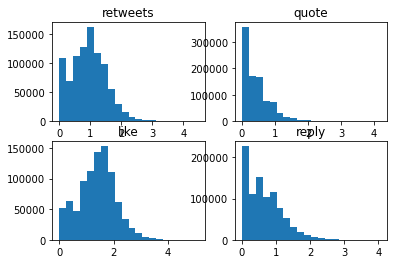

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=2)

i = 0
L = [retweets_log_plus, quote_log_plus, like_log_plus, reply_log_plus]
name = ["retweets", "quote", "like", "reply"]
for row in ax:
    for col in row:
        col.hist(L[i], bins=20)
        col.title.set_text(name[i])
        i += 1

plt.show()

In [79]:
retweet_per_follower = np.array(np.log10(1+df.public_metrics_retweet_count) - np.log10(1+df.public_metrics_followers_count))


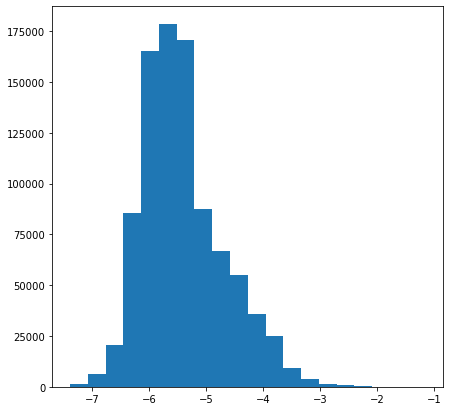

In [81]:
plt.figure(figsize=(7,7))
plt.hist(retweet_per_follower, bins = 20)
plt.show()

Although number of retweets (or likes, replies, etc) per follower can be good indicators of Tweet's popularity, they are not as relevant in terms of predicting stock prices, where the absolute exposure of the Tweet is likely to matter more than the spreading intensity of the Tweet itself.

In [21]:
df[['entities_cashtags', 'entities_hashtags']]

,entities_cashtags,entities_hashtags
0,1,3
1,1,3
2,0,0
3,1,3
4,1,3
...,...,...
914518,0,2
914519,1,3
914520,1,3
914521,1,3


In [23]:
df.entities_urls

0         1
1         1
2         1
3         1
4         1
         ..
914518    1
914519    1
914520    1
914521    1
914522    1
Name: entities_urls, Length: 914523, dtype: int64

#### Dependent variables: (4)
- Like count
- Quote count
- Reply count
- Retweet count

#### Possible features: (21)
- no of cashtags
- no of hashtags
- no of entity urls
- no of entity mentions
- User's followers count
- User's following count
- User's listed count
- User's tweets count
- Tweet length (words)
- Tweet length (chars)
- Compound vader
- Positive vader
- Negative vader
- Neutral vader
- News agency names count
- Henry08 positive
- Henry08 negative
- LM11 positive
- LM11 negative
- Hagenau13 positive
- Hagenau13 negative

In [67]:
df.columns

Index(['created_at', 'entities_cashtags', 'entities_hashtags', 'entities_urls',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count', 'text',
       'entities_mentions', 'created_at_user',
       'public_metrics_followers_count', 'public_metrics_following_count',
       'public_metrics_listed_count', 'public_metrics_tweet_count',
       'media_type', 'Company_name', 'Word_count_News_agencies',
       'Word_count_Henry08_pos', 'Word_count_Henry08_neg',
       'Word_count_LM11_pos', 'Word_count_LM11_neg',
       'Word_count_Hagenau13_pos', 'Word_count_Hagenau13_neg',
       'Tweet_Length_characters', 'Tweet_Length_words', 'Compound_vader',
       'Positive_vader', 'Negative_vader', 'Neutral_vader'],
      dtype='object')

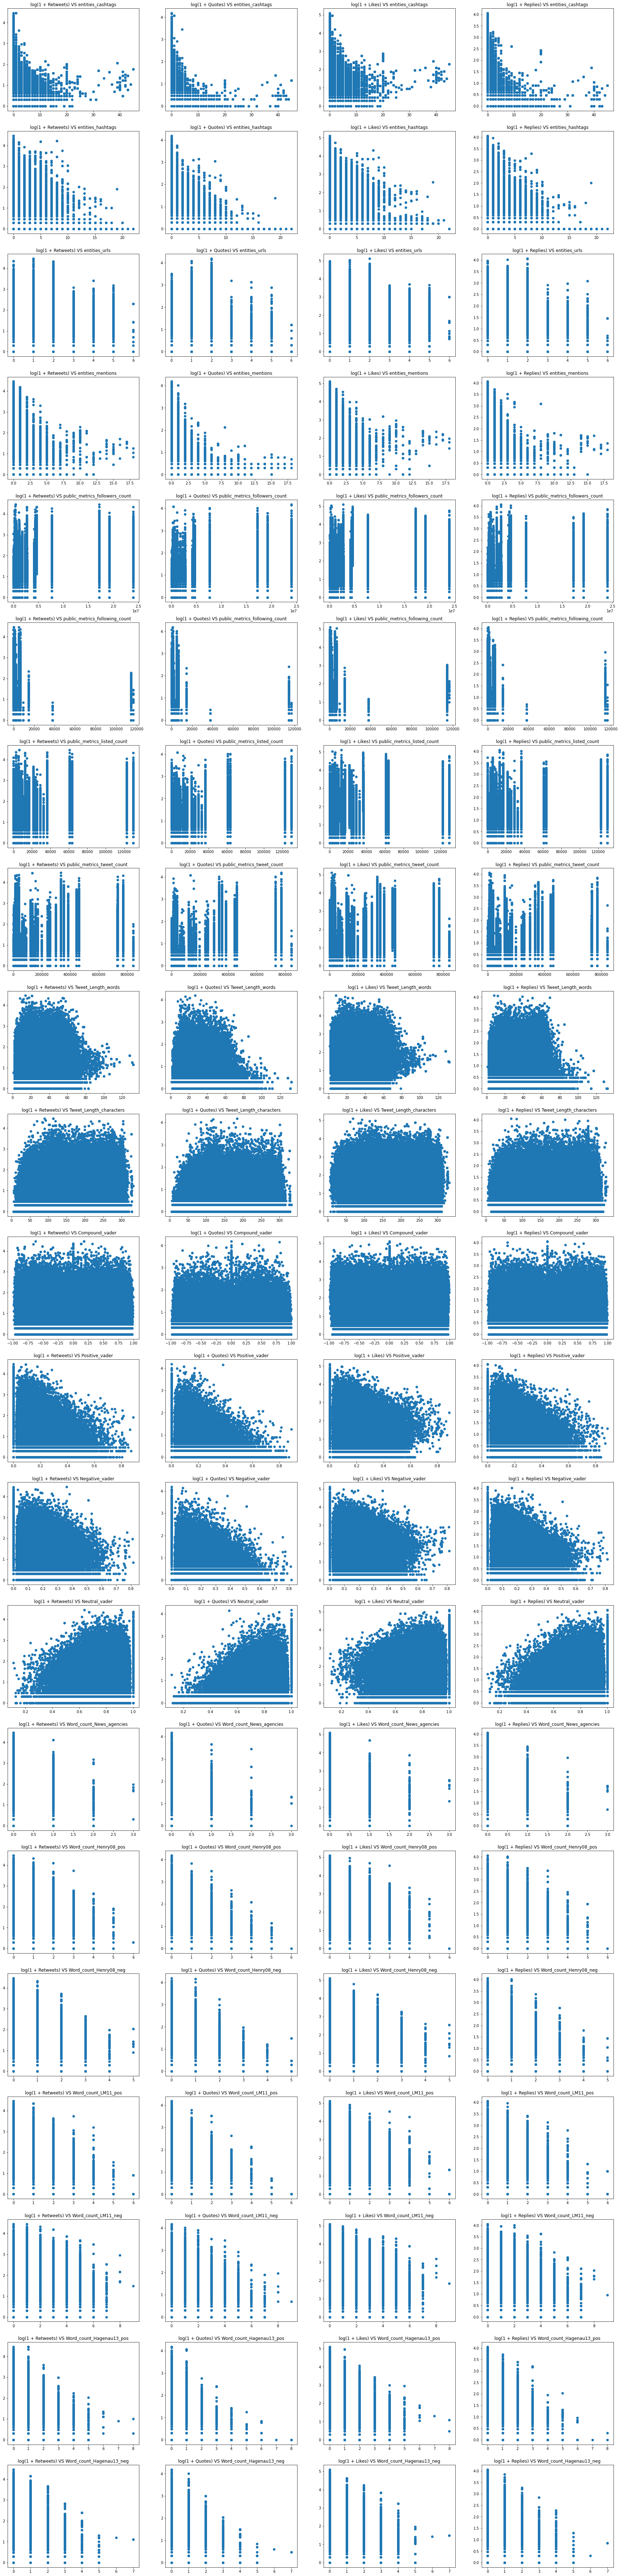

In [74]:
L = [retweets_log_plus, quote_log_plus, like_log_plus, reply_log_plus]
name = ["Retweets", "Quotes", "Likes", "Replies"]
ft_name = ["entities_cashtags", "entities_hashtags", "entities_urls", "entities_mentions", 
           "public_metrics_followers_count", "public_metrics_following_count",
           "public_metrics_listed_count", "public_metrics_tweet_count",
           "Tweet_Length_words", "Tweet_Length_characters", "Compound_vader", "Positive_vader",
           "Negative_vader", "Neutral_vader", "Word_count_News_agencies", 'Word_count_Henry08_pos', 
           'Word_count_Henry08_neg', 'Word_count_LM11_pos', 'Word_count_LM11_neg', 
           'Word_count_Hagenau13_pos', 'Word_count_Hagenau13_neg']
ft = [np.array(df[ft_name[i]]) for i in range(len(ft_name))]

f = plt.figure(figsize=(30,130))

n = 1
for i in range(len(ft)):
    for j in range(len(L)):
        ax = f.add_subplot(21, 4, n)
        ax.scatter(ft[i], L[j])
        ax.set_title("log(1 + " + name[j] + ") VS " + ft_name[i])
        n += 1

plt.show()

## Model Selection

For now, take $\log(1+like)$ and similiarly for retweets, quotes and replies as target.

Model options:
- Multiple linear regression (may need non-linear features added later)
- Tree-based methods
- k-nearest neighbors (perhaps too simplistic?)
- Neural nets (probably not good if the data are too noisy)


Let's start with models in the tree family. For these models, we don't even need to take the log. Decision tree? 

In [76]:
X = np.array(df[ft_name])

In [77]:
X.shape

(914523, 21)

In [78]:
len(ft_name)

21

In [83]:
like = np.array(df["public_metrics_like_count"])
quote = np.array(df["public_metrics_quote_count"])
reply = np.array(df["public_metrics_reply_count"])
retweet = np.array(df["public_metrics_retweet_count"])

In [84]:
like.shape

(914523,)

In [82]:
from sklearn.model_selection import train_test_split

##### Likes with Decision Tree

In [86]:
X_train, X_test, like_train, like_test = train_test_split(X, like, test_size=0.2)

Cross-validation with `max_depth` and `min_samples_split`

In [87]:
from sklearn.model_selection import KFold

In [88]:
from sklearn.metrics import mean_squared_error

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
depths = [1, 2, 5, 10, 20, 50, 100]
samps = [1, 3, 5, 10, 30, 100, 300, 1000]

mse = [[[-1 for i in range(4)] for j in range(len(depths) + 1)] for y in samps]

kf = KFold(n_splits=4, shuffle=True)
i = 0
for train_index, test_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[test_index]
    like_tr, like_val = like_train[train_index], like_train[test_index]
    for j in range(len(depths) + 1):
        for k in range(len(samps)):
            if j == len(depths):
                model = DecisionTreeRegressor(min_samples_leaf=samps[k])
            else:
                model = DecisionTreeRegressor(max_depth=depths[j], min_samples_leaf=samps[k])
            model.fit(X_tr, like_tr)
            pred = model.predict(X_val)
            mse[k][j][i] = mean_squared_error(like_val, pred)
            print("i:", i, ", j:", j, ", k:", k)
    i += 1

i: 0 , j: 0 , k: 0
i: 0 , j: 0 , k: 1
i: 0 , j: 0 , k: 2
i: 0 , j: 0 , k: 3
i: 0 , j: 0 , k: 4
i: 0 , j: 0 , k: 5
i: 0 , j: 0 , k: 6
i: 0 , j: 0 , k: 7
i: 0 , j: 1 , k: 0
i: 0 , j: 1 , k: 1
i: 0 , j: 1 , k: 2
i: 0 , j: 1 , k: 3
i: 0 , j: 1 , k: 4
i: 0 , j: 1 , k: 5
i: 0 , j: 1 , k: 6
i: 0 , j: 1 , k: 7
i: 0 , j: 2 , k: 0
i: 0 , j: 2 , k: 1
i: 0 , j: 2 , k: 2
i: 0 , j: 2 , k: 3
i: 0 , j: 2 , k: 4
i: 0 , j: 2 , k: 5
i: 0 , j: 2 , k: 6
i: 0 , j: 2 , k: 7
i: 0 , j: 3 , k: 0
i: 0 , j: 3 , k: 1
i: 0 , j: 3 , k: 2
i: 0 , j: 3 , k: 3
i: 0 , j: 3 , k: 4
i: 0 , j: 3 , k: 5
i: 0 , j: 3 , k: 6
i: 0 , j: 3 , k: 7
i: 0 , j: 4 , k: 0
i: 0 , j: 4 , k: 1
i: 0 , j: 4 , k: 2
i: 0 , j: 4 , k: 3
i: 0 , j: 4 , k: 4
i: 0 , j: 4 , k: 5
i: 0 , j: 4 , k: 6
i: 0 , j: 4 , k: 7
i: 0 , j: 5 , k: 0
i: 0 , j: 5 , k: 1
i: 0 , j: 5 , k: 2
i: 0 , j: 5 , k: 3
i: 0 , j: 5 , k: 4
i: 0 , j: 5 , k: 5
i: 0 , j: 5 , k: 6
i: 0 , j: 5 , k: 7
i: 0 , j: 6 , k: 0
i: 0 , j: 6 , k: 1
i: 0 , j: 6 , k: 2
i: 0 , j: 6 , k: 3
i: 0 , j: 6 

In [132]:
cv_mse = np.mean(mse, axis=2)

In [133]:
best = [0, 0]
score = cv_mse[0][0]
for i in range(len(cv_mse)):
    for j in range(len(cv_mse[0])):
        if cv_mse[i][j] < score:
            best[0] = i
            best[1] = j
            score = cv_mse[i][j]
print(best)

[0, 3]


In [134]:
cv_mse[0][3]

394985.8540674364

In [104]:
len(cv_mse[0])

8

So, CV-MSE indicates the optimal `min_samples_leaf` = 1 and `max_depth` = 10

In [135]:
cv_mse

array([[483762.18014279, 473248.80902833, 420165.02121647,
        394985.85406744, 502194.99437561, 560056.17713919,
        563860.97041396, 549981.73234531],
       [483762.18014279, 473248.80902833, 418290.33290097,
        403622.47810558, 441302.94216835, 446836.49407201,
        451123.90943799, 445780.79001855],
       [483762.18014279, 473248.80902833, 420610.2385873 ,
        401060.56106348, 423558.13828675, 427395.08011699,
        430757.65220917, 430428.6244558 ],
       [483762.18014279, 473248.80902833, 423861.83911042,
        423204.5362181 , 430424.43311341, 432181.42406164,
        432185.55837083, 432194.87912085],
       [483762.18014279, 473248.80902833, 430696.06414381,
        421825.91445639, 423656.26279629, 424147.85811707,
        424148.57189145, 424149.27819238],
       [483762.18014279, 473248.80902833, 433200.22616563,
        427553.83120016, 427656.60290447, 427728.62059373,
        427726.23399551, 427729.59081908],
       [483762.18014279, 473248.80

In [106]:
tree_like = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1)

tree_like.fit(X_train, like_train)

DecisionTreeRegressor(max_depth=10)

In [107]:
from sklearn import tree

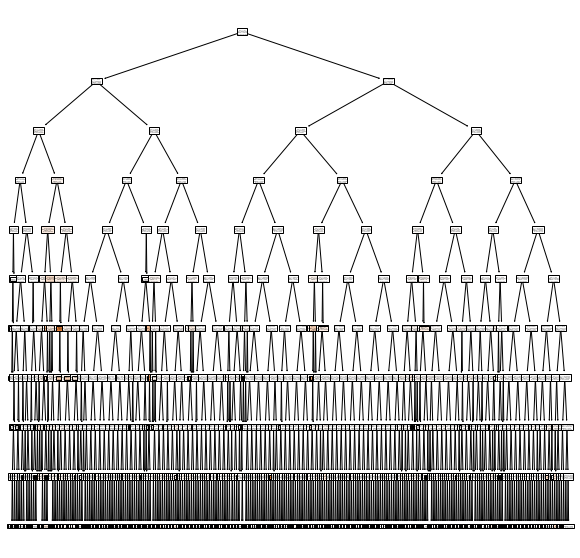

In [108]:
plt.figure(figsize = (10,10))

tree_drawing = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1)
fig = tree_drawing.fit(X_train, like_train)
tree.plot_tree(fig, filled = True)
plt.show()

From the number of nodes alone, this probably overfits. Let's see more.

In [109]:
mean_squared_error(like_train, tree_like.predict(X_train))

256968.5312495318

The fact that this number is quite significantly smaller than the CV MSE (about 5/8) implies that decision tree is likely to overfit. A more rigorous evidence is to further split the training set into `tr` and `val`, then compare MSE across the two sets.

In [122]:
X_tr, X_val, like_tr, like_val = train_test_split(X_train, like_train, test_size=0.25)

In [123]:
tree_like2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1)

tree_like2.fit(X_tr, like_tr)

DecisionTreeRegressor(max_depth=10)

In [124]:
pred_tr = tree_like2.predict(X_tr)
pred_val = tree_like2.predict(X_val)

In [125]:
print("Tr MSE:", mean_squared_error(like_tr, pred_tr))
print("Val MSE:", mean_squared_error(like_val, pred_val))

Tr MSE: 248558.48885214434
Val MSE: 386677.1950520713


Told ya

Baseline model with a mean 

In [126]:
print("Tr MSE:", mean_squared_error(like_tr, np.ones_like(like_tr)*np.mean(like_tr)))
print("Val MSE:", mean_squared_error(like_val, np.ones_like(like_val)*np.mean(like_tr)))

Tr MSE: 512077.38242849265
Val MSE: 429120.03222175414


Baseline model with a median 

In [127]:
print("Tr MSE:", mean_squared_error(like_tr, np.ones_like(like_tr)*np.median(like_tr)))
print("Val MSE:", mean_squared_error(like_val, np.ones_like(like_val)*np.median(like_tr)))

Tr MSE: 517830.2587855582
Val MSE: 434678.7438123616


##### Log Like with Decision Tree

In [136]:
X_train, X_test, ll_train, ll_test = train_test_split(X, like_log_plus, test_size=0.2)

In [137]:
depths = [1, 2, 5, 10, 20, 50, 100]
samps = [1, 3, 5, 10, 30, 100, 300, 1000]

mse_treelog = [[[-1 for i in range(4)] for j in range(len(depths) + 1)] for y in samps]

kf = KFold(n_splits=4, shuffle=True)
i = 0
for train_index, test_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[test_index]
    ll_tr, ll_val = ll_train[train_index], ll_train[test_index]
    for j in range(len(depths) + 1):
        for k in range(len(samps)):
            if j == len(depths):
                model = DecisionTreeRegressor(min_samples_leaf=samps[k])
            else:
                model = DecisionTreeRegressor(max_depth=depths[j], min_samples_leaf=samps[k])
            model.fit(X_tr, ll_tr)
            pred = model.predict(X_val)
            mse_treelog[k][j][i] = mean_squared_error(ll_val, pred)
            print("i:", i, ", j:", j, ", k:", k)
    i += 1

i: 0 , j: 0 , k: 0
i: 0 , j: 0 , k: 1
i: 0 , j: 0 , k: 2
i: 0 , j: 0 , k: 3
i: 0 , j: 0 , k: 4
i: 0 , j: 0 , k: 5
i: 0 , j: 0 , k: 6
i: 0 , j: 0 , k: 7
i: 0 , j: 1 , k: 0
i: 0 , j: 1 , k: 1
i: 0 , j: 1 , k: 2
i: 0 , j: 1 , k: 3
i: 0 , j: 1 , k: 4
i: 0 , j: 1 , k: 5
i: 0 , j: 1 , k: 6
i: 0 , j: 1 , k: 7
i: 0 , j: 2 , k: 0
i: 0 , j: 2 , k: 1
i: 0 , j: 2 , k: 2
i: 0 , j: 2 , k: 3
i: 0 , j: 2 , k: 4
i: 0 , j: 2 , k: 5
i: 0 , j: 2 , k: 6
i: 0 , j: 2 , k: 7
i: 0 , j: 3 , k: 0
i: 0 , j: 3 , k: 1
i: 0 , j: 3 , k: 2
i: 0 , j: 3 , k: 3
i: 0 , j: 3 , k: 4
i: 0 , j: 3 , k: 5
i: 0 , j: 3 , k: 6
i: 0 , j: 3 , k: 7
i: 0 , j: 4 , k: 0
i: 0 , j: 4 , k: 1
i: 0 , j: 4 , k: 2
i: 0 , j: 4 , k: 3
i: 0 , j: 4 , k: 4
i: 0 , j: 4 , k: 5
i: 0 , j: 4 , k: 6
i: 0 , j: 4 , k: 7
i: 0 , j: 5 , k: 0
i: 0 , j: 5 , k: 1
i: 0 , j: 5 , k: 2
i: 0 , j: 5 , k: 3
i: 0 , j: 5 , k: 4
i: 0 , j: 5 , k: 5
i: 0 , j: 5 , k: 6
i: 0 , j: 5 , k: 7
i: 0 , j: 6 , k: 0
i: 0 , j: 6 , k: 1
i: 0 , j: 6 , k: 2
i: 0 , j: 6 , k: 3
i: 0 , j: 6 

In [138]:
cv_mse_treelog = np.mean(mse_treelog, axis=2)

In [139]:
best = [0, 0]
score = cv_mse_treelog[0][0]
for i in range(len(cv_mse_treelog)):
    for j in range(len(cv_mse_treelog[0])):
        if cv_mse_treelog[i][j] < score:
            best[0] = i
            best[1] = j
            score = cv_mse_treelog[i][j]
print(best)
print(score)

[4, 4]
0.13381822098138857


In [140]:
cv_mse_treelog

array([[0.35967689, 0.2918258 , 0.18409936, 0.14133265, 0.13961051,
        0.18101434, 0.18177049, 0.18182484],
       [0.35967689, 0.2918258 , 0.18409936, 0.14134194, 0.13656357,
        0.1558604 , 0.15597587, 0.1559151 ],
       [0.35967689, 0.2918258 , 0.18409936, 0.1412765 , 0.13530388,
        0.14657867, 0.14663166, 0.14660507],
       [0.35967689, 0.2918258 , 0.18409936, 0.14127734, 0.13408981,
        0.13853438, 0.13851476, 0.13850024],
       [0.35967689, 0.2918258 , 0.18409605, 0.14134524, 0.13381822,
        0.13445103, 0.13445268, 0.13445434],
       [0.35967689, 0.2918258 , 0.18417249, 0.14174726, 0.13511075,
        0.13497546, 0.13497437, 0.1349738 ],
       [0.35967689, 0.2918258 , 0.18423015, 0.14310524, 0.13821576,
        0.1381666 , 0.13816644, 0.1381666 ],
       [0.35967689, 0.2918258 , 0.18452775, 0.14778564, 0.14558352,
        0.1455741 , 0.1455741 , 0.1455741 ]])

In [141]:
X_tr, X_val, ll_tr, ll_val = train_test_split(X_train, ll_train, test_size=0.25)

In [143]:
tree_ll2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=30)

tree_ll2.fit(X_tr, ll_tr)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=30)

In [144]:
pred_tr_ll = tree_ll2.predict(X_tr)
pred_val_ll = tree_ll2.predict(X_val)

In [145]:
print("Tr MSE:", mean_squared_error(ll_tr, pred_tr_ll))
print("Val MSE:", mean_squared_error(ll_val, pred_val_ll))

Tr MSE: 0.11975177550367526
Val MSE: 0.13433265208254036


Baseline model with a mean 

In [146]:
print("Tr MSE:", mean_squared_error(ll_tr, np.ones_like(ll_tr)*np.mean(ll_tr)))
print("Val MSE:", mean_squared_error(ll_val, np.ones_like(ll_val)*np.mean(ll_tr)))

Tr MSE: 0.47820637565722773
Val MSE: 0.47677942734675954


Baseline model with a median 

In [147]:
print("Tr MSE:", mean_squared_error(ll_tr, np.ones_like(ll_tr)*np.median(ll_tr)))
print("Val MSE:", mean_squared_error(ll_val, np.ones_like(ll_val)*np.median(ll_tr)))

Tr MSE: 0.4804130620403285
Val MSE: 0.4792539585690485


Feature importances

In [148]:
tree_ll2.feature_importances_

array([0.00319696, 0.00747852, 0.02235701, 0.00708002, 0.4815732 ,
       0.27724286, 0.08708533, 0.06175978, 0.01043248, 0.01500599,
       0.00586   , 0.00394459, 0.00526851, 0.00531841, 0.0011416 ,
       0.00082547, 0.00062887, 0.00075061, 0.00170044, 0.00061647,
       0.00073285])

In [149]:
ft_name

['entities_cashtags',
 'entities_hashtags',
 'entities_urls',
 'entities_mentions',
 'public_metrics_followers_count',
 'public_metrics_following_count',
 'public_metrics_listed_count',
 'public_metrics_tweet_count',
 'Tweet_Length_words',
 'Tweet_Length_characters',
 'Compound_vader',
 'Positive_vader',
 'Negative_vader',
 'Neutral_vader',
 'Word_count_News_agencies',
 'Word_count_Henry08_pos',
 'Word_count_Henry08_neg',
 'Word_count_LM11_pos',
 'Word_count_LM11_neg',
 'Word_count_Hagenau13_pos',
 'Word_count_Hagenau13_neg']

##### Likes with Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
depths = [5, 10, 20]
samps = [10, 100, 1000, 10000]
fts = [3, 7, 12, 16, 21]
est = [3, 10, 30, 100, 300]

mse = [[[[[-1 for i in range(5)] for j in range(len(depths))] for y in samps] for x in fts] for w in est]

kf = KFold(n_splits=4, shuffle=True)
i = 0
for train_index, test_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[test_index]
    like_tr, like_val = like_train[train_index], like_train[test_index]
    for j in range(len(depths)):
        for k in range(len(samps)):
            for l in range(len(fts)):
                for m in range(len(est)):
                    model = RandomForestRegressor(n_estimators=est[m], max_features=fts[l], max_depth=depths[j], min_samples_leaf=samps[k])
                    model.fit(X_tr, like_tr)
                    pred = model.predict(X_val)
                    mse[m][l][k][j][i] = mean_squared_error(like_val, pred)
                    print("i:", i, ", j:", j, ", k:", k, ", l:", l, ", m:", m)
    i += 1
    break

i: 0 , j: 0 , k: 0 , l: 0 , m: 0
i: 0 , j: 0 , k: 0 , l: 0 , m: 1
i: 0 , j: 0 , k: 0 , l: 0 , m: 2
i: 0 , j: 0 , k: 0 , l: 0 , m: 3
i: 0 , j: 0 , k: 0 , l: 0 , m: 4
i: 0 , j: 0 , k: 0 , l: 1 , m: 0
i: 0 , j: 0 , k: 0 , l: 1 , m: 1
i: 0 , j: 0 , k: 0 , l: 1 , m: 2
i: 0 , j: 0 , k: 0 , l: 1 , m: 3
i: 0 , j: 0 , k: 0 , l: 1 , m: 4
i: 0 , j: 0 , k: 0 , l: 2 , m: 0
i: 0 , j: 0 , k: 0 , l: 2 , m: 1
i: 0 , j: 0 , k: 0 , l: 2 , m: 2
i: 0 , j: 0 , k: 0 , l: 2 , m: 3
i: 0 , j: 0 , k: 0 , l: 2 , m: 4
i: 0 , j: 0 , k: 0 , l: 3 , m: 0
i: 0 , j: 0 , k: 0 , l: 3 , m: 1
i: 0 , j: 0 , k: 0 , l: 3 , m: 2
i: 0 , j: 0 , k: 0 , l: 3 , m: 3
i: 0 , j: 0 , k: 0 , l: 3 , m: 4
i: 0 , j: 0 , k: 0 , l: 4 , m: 0
i: 0 , j: 0 , k: 0 , l: 4 , m: 1
i: 0 , j: 0 , k: 0 , l: 4 , m: 2
i: 0 , j: 0 , k: 0 , l: 4 , m: 3
i: 0 , j: 0 , k: 0 , l: 4 , m: 4
i: 0 , j: 0 , k: 1 , l: 0 , m: 0
i: 0 , j: 0 , k: 1 , l: 0 , m: 1
i: 0 , j: 0 , k: 1 , l: 0 , m: 2
i: 0 , j: 0 , k: 1 , l: 0 , m: 3
i: 0 , j: 0 , k: 1 , l: 0 , m: 4
i: 0 , j: 

i: 0 , j: 2 , k: 1 , l: 4 , m: 4
i: 0 , j: 2 , k: 2 , l: 0 , m: 0
i: 0 , j: 2 , k: 2 , l: 0 , m: 1
i: 0 , j: 2 , k: 2 , l: 0 , m: 2
i: 0 , j: 2 , k: 2 , l: 0 , m: 3
i: 0 , j: 2 , k: 2 , l: 0 , m: 4
i: 0 , j: 2 , k: 2 , l: 1 , m: 0
i: 0 , j: 2 , k: 2 , l: 1 , m: 1
i: 0 , j: 2 , k: 2 , l: 1 , m: 2
i: 0 , j: 2 , k: 2 , l: 1 , m: 3
i: 0 , j: 2 , k: 2 , l: 1 , m: 4
i: 0 , j: 2 , k: 2 , l: 2 , m: 0
i: 0 , j: 2 , k: 2 , l: 2 , m: 1
i: 0 , j: 2 , k: 2 , l: 2 , m: 2
i: 0 , j: 2 , k: 2 , l: 2 , m: 3
i: 0 , j: 2 , k: 2 , l: 2 , m: 4
i: 0 , j: 2 , k: 2 , l: 3 , m: 0
i: 0 , j: 2 , k: 2 , l: 3 , m: 1
i: 0 , j: 2 , k: 2 , l: 3 , m: 2
i: 0 , j: 2 , k: 2 , l: 3 , m: 3
i: 0 , j: 2 , k: 2 , l: 3 , m: 4
i: 0 , j: 2 , k: 2 , l: 4 , m: 0
i: 0 , j: 2 , k: 2 , l: 4 , m: 1
i: 0 , j: 2 , k: 2 , l: 4 , m: 2
i: 0 , j: 2 , k: 2 , l: 4 , m: 3
i: 0 , j: 2 , k: 2 , l: 4 , m: 4
i: 0 , j: 2 , k: 3 , l: 0 , m: 0
i: 0 , j: 2 , k: 3 , l: 0 , m: 1
i: 0 , j: 2 , k: 3 , l: 0 , m: 2
i: 0 , j: 2 , k: 3 , l: 0 , m: 3
i: 0 , j: 

KeyboardInterrupt: 

##### Likes with AdaBoost

##### Likes with XGBoost